In [1]:
import numpy as np
from matplotlib import pyplot as plt

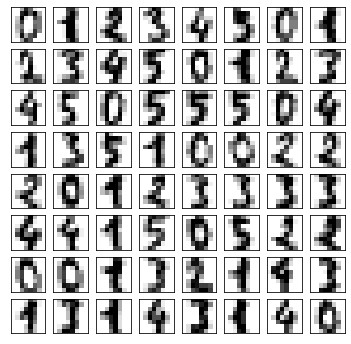

In [2]:
from sklearn.datasets import load_digits
digits = load_digits(n_class=6)

fig, ax = plt.subplots(8, 8, figsize=(6, 6))
for i, axi in enumerate(ax.flat):
    axi.imshow(digits.images[i], cmap='binary')
    axi.set(xticks=[], yticks=[])

In [3]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
projection = iso.fit_transform(digits.data)

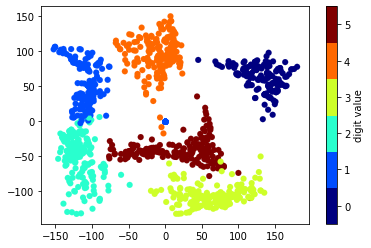

In [4]:
plt.scatter(projection[:, 0], projection[:, 1], lw=0.1, c=digits.target, cmap=plt.cm.get_cmap('jet', 6))
plt.colorbar(ticks=range(6), label='digit value')
plt.clim(-0.5, 5.5);

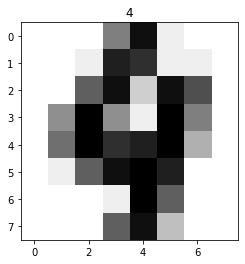

In [5]:
plt.imshow(digits.images[10], cmap='binary');
plt.title(digits.target[10]);

In [6]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)

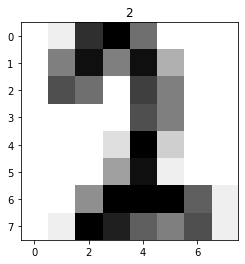

In [7]:
plt.imshow(X_train[0].reshape(8,8), cmap='binary')
plt.title(y_train[0]);

In [8]:
scaler = preprocessing.StandardScaler().fit(X_train)
S_train = scaler.transform(X_train)
S_train

array([[ 0.        ,  0.52600762,  1.39783655, ...,  0.2400056 ,
         1.97867407,  0.15591061],
       [ 0.        ,  2.35913287,  1.7916753 , ..., -1.17348158,
        -0.4917644 , -0.24472045],
       [ 0.        , -0.39055501, -1.16211533, ...,  1.30012098,
        -0.26717908, -0.24472045],
       ...,
       [ 0.        , -0.39055501, -1.16211533, ..., -1.17348158,
        -0.4917644 , -0.24472045],
       [ 0.        , -0.39055501, -1.16211533, ..., -1.17348158,
        -0.4917644 , -0.24472045],
       [ 0.        , -0.39055501, -1.16211533, ...,  1.65349277,
         1.08033281, -0.24472045]])

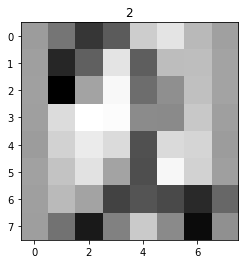

In [9]:
plt.imshow(S_train[0].reshape(8,8), cmap='binary')
plt.title(y_train[0]);

In [10]:
model = LogisticRegression()

model.fit(S_train, y_train)

p_train = model.predict(S_train)
acc_train = sum(p_train == y_train) / len(y_train)
print('Accuracy in train: %.3f' %acc_train)

S_test = scaler.transform(X_test)
p_test = model.predict(S_test)
acc_test = sum(p_test == y_test) / len(y_test)
print('Accuracy in test: %.3f' %acc_test)

Accuracy in train: 1.000
Accuracy in test: 0.993


In [11]:
diff = p_test != y_test
errors = X_test[diff]
errors.shape

(2, 64)

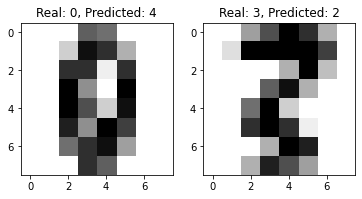

In [12]:
fig, ax = plt.subplots(1, errors.shape[0], figsize=(6,6))

for i, axi in enumerate(ax.flat):
    axi.imshow(errors[i].reshape(8,8), cmap='binary')
    axi.set_title(f"Real: {y_test[diff][i]}, Predicted: {p_test[diff][i]}");